# This notebook shows how to generate basic statistics for the paper

Making Figure 3

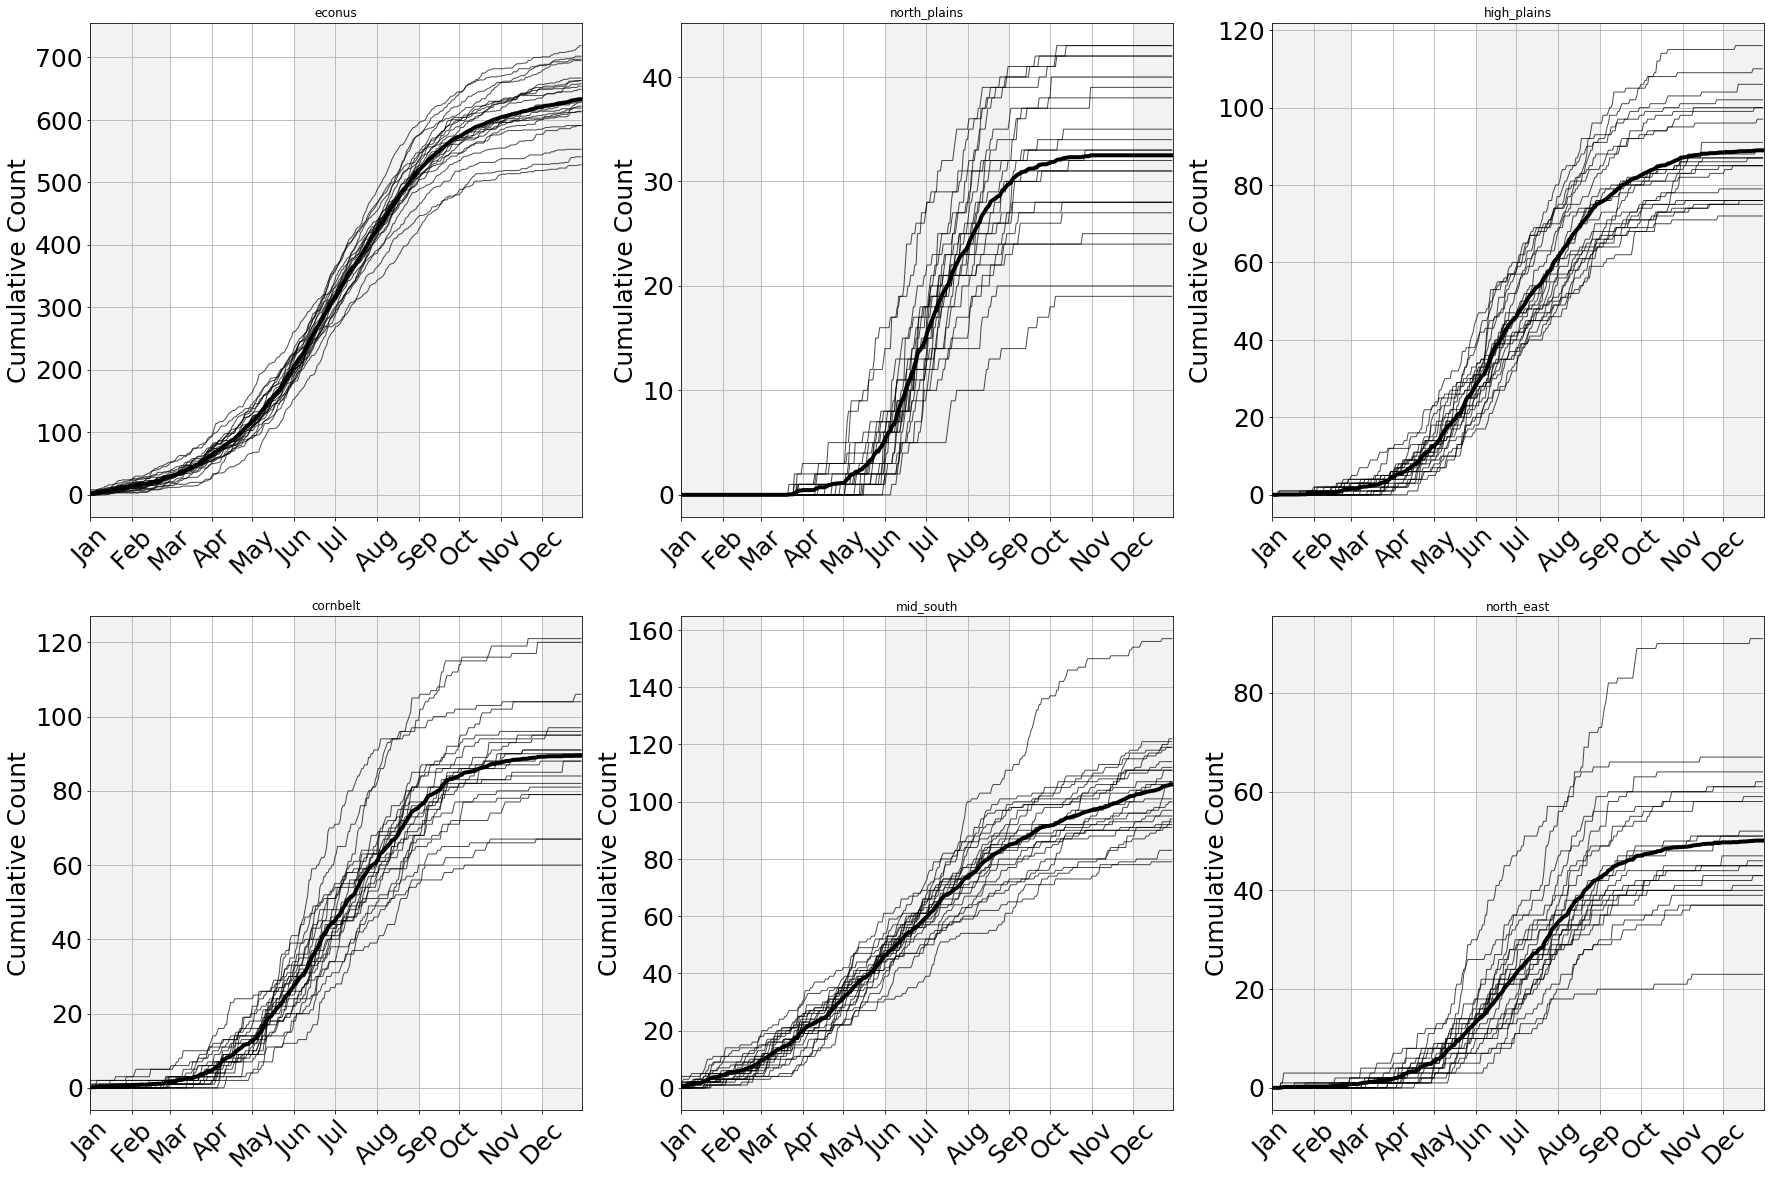

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

month_doy = {'Jan':1, 'Feb':32, 'Mar':60, 
             'Apr':91, 'May':121, 'Jun':152, 
             'Jul':182, 'Aug':213, 'Sep':244, 
             'Oct':274, 'Nov':305, 'Dec':335}

def draw_cumu_labels(ax):
    ax.set_xlim(1, 365)
    
    ax.set_xticks(list(month_doy.values()))
    ax.set_xticklabels(list(month_doy.keys()), rotation=45)
    
    ax.axvspan(month_doy['Jan'], month_doy['Mar'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Jun'], month_doy['Sep'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Dec'], 365, facecolor='0.5', alpha=0.1)
    ax.grid()
    return ax

plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
regions = {'conus':'CONUS', 'cornbelt':'Corn Belt', 'high_plains':'High Plains', 
            'mid_south':'Mid South', 'north_east':'Northeast', 'north_plains':'North Plains'}

abrev = {'conus':'CO', 'cornbelt':'CB', 'high_plains':'HP', 
            'mid_south':'MS', 'north_east':'NE', 'north_plains':'NP'}

colors = ['lightgreen', 'darkkhaki', 'darkgreen', 'seagreen', 'khaki']

d = {'Year':[], 'Count':[], 'Region':[]}
ax = plt.subplot(1,1,1)

linetype = ['-', '--', ':', '-', '--', ':']
color = ['k', 'k', 'k', 'lightgrey', 'lightgrey', 'lightgrey']

track_loc = "../data/track_data/"

for count, key in enumerate(['econus', 'north_plains', 'high_plains', 'cornbelt', 'mid_south', 'north_east']):
    
    ax = plt.subplot(2, 3, count+1)

    df_select = pd.read_csv(track_loc + key + "_mcs_swaths_within.csv")
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')

    df_select['doy'] = df_select.index.dayofyear
    years = df_select.groupby(df_select.index.year)
    year_data = np.zeros(shape=(22, 365))

    texts = []

    for yid, year in years:

        data = []

        if yid in [1996, 2000, 2004, 2008, 2012, 2016]:

            #iterate 1 to 366 days
            for i in range(1, 367):

                #business as usual
                if i != 60:
                    s_count = year[year['doy'].values <= i]
                    data.append(s_count.storm_num.nunique())

                #Otherwise, set February 29th to February 28th count 
                else:
                    s_count = year[year['doy'].values <= i]
                    data[-1] = s_count.storm_num.nunique()
        else:

            #iterate 1 to 365 days
            for i in range(1, 366):
                s_count = year[year['doy'].values <= i]
                data.append(s_count.storm_num.nunique())

        year_data[yid-1996, :] = np.array(data)
        
        ax.plot(data, 'k-', linewidth=1, alpha=0.7)
        d['Year'].append(yid)
        d['Count'].append(data[-1])
        d['Region'].append(key)

    ax.set_title(key)
    ax.plot(np.mean(year_data, axis=0), 'k-', linewidth=4)
    ax.set_ylabel("Cumulative Count", fontsize=25)

    draw_cumu_labels(ax)
    
#plt.savefig("Fig3.tif", bbox_inches='tight', dpi=300)

Run through the yearly generated stats.

In [2]:
from scipy.stats import variation

counts = pd.DataFrame.from_dict(d)

for gid, group in counts.groupby('Region'):
    
    g = group.sort_values(by='Count', ascending=False)
    
    print(g)
    print(print('Mean MCS', np.mean(g.Count.values)))
    print(print('C.V. MCS', variation(g.Count.values)))
    print(print('V. MCS', np.std(g.Count.values)))

    Year  Count    Region
80  2010    121  cornbelt
76  2006    120  cornbelt
78  2008    106  cornbelt
77  2007    104  cornbelt
68  1998     97  cornbelt
70  2000     96  cornbelt
71  2001     95  cornbelt
81  2011     95  cornbelt
86  2016     91  cornbelt
87  2017     91  cornbelt
74  2004     90  cornbelt
75  2005     89  cornbelt
72  2002     88  cornbelt
66  1996     88  cornbelt
85  2015     84  cornbelt
84  2014     82  cornbelt
69  1999     81  cornbelt
73  2003     79  cornbelt
83  2013     79  cornbelt
67  1997     67  cornbelt
82  2012     67  cornbelt
79  2009     60  cornbelt
Mean MCS 89.54545454545455
None
C.V. MCS 0.16556318284174884
None
V. MCS 14.825430463556602
None
    Year  Count  Region
11  2007    719  econus
12  2008    702  econus
8   2004    697  econus
13  2009    695  econus
5   2001    667  econus
15  2011    663  econus
10  2006    663  econus
6   2002    658  econus
14  2010    654  econus
20  2016    649  econus
7   2003    633  econus
0   1996    630  

Compare mean counts between the regions from 2002-2017 (Figure 10)

C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


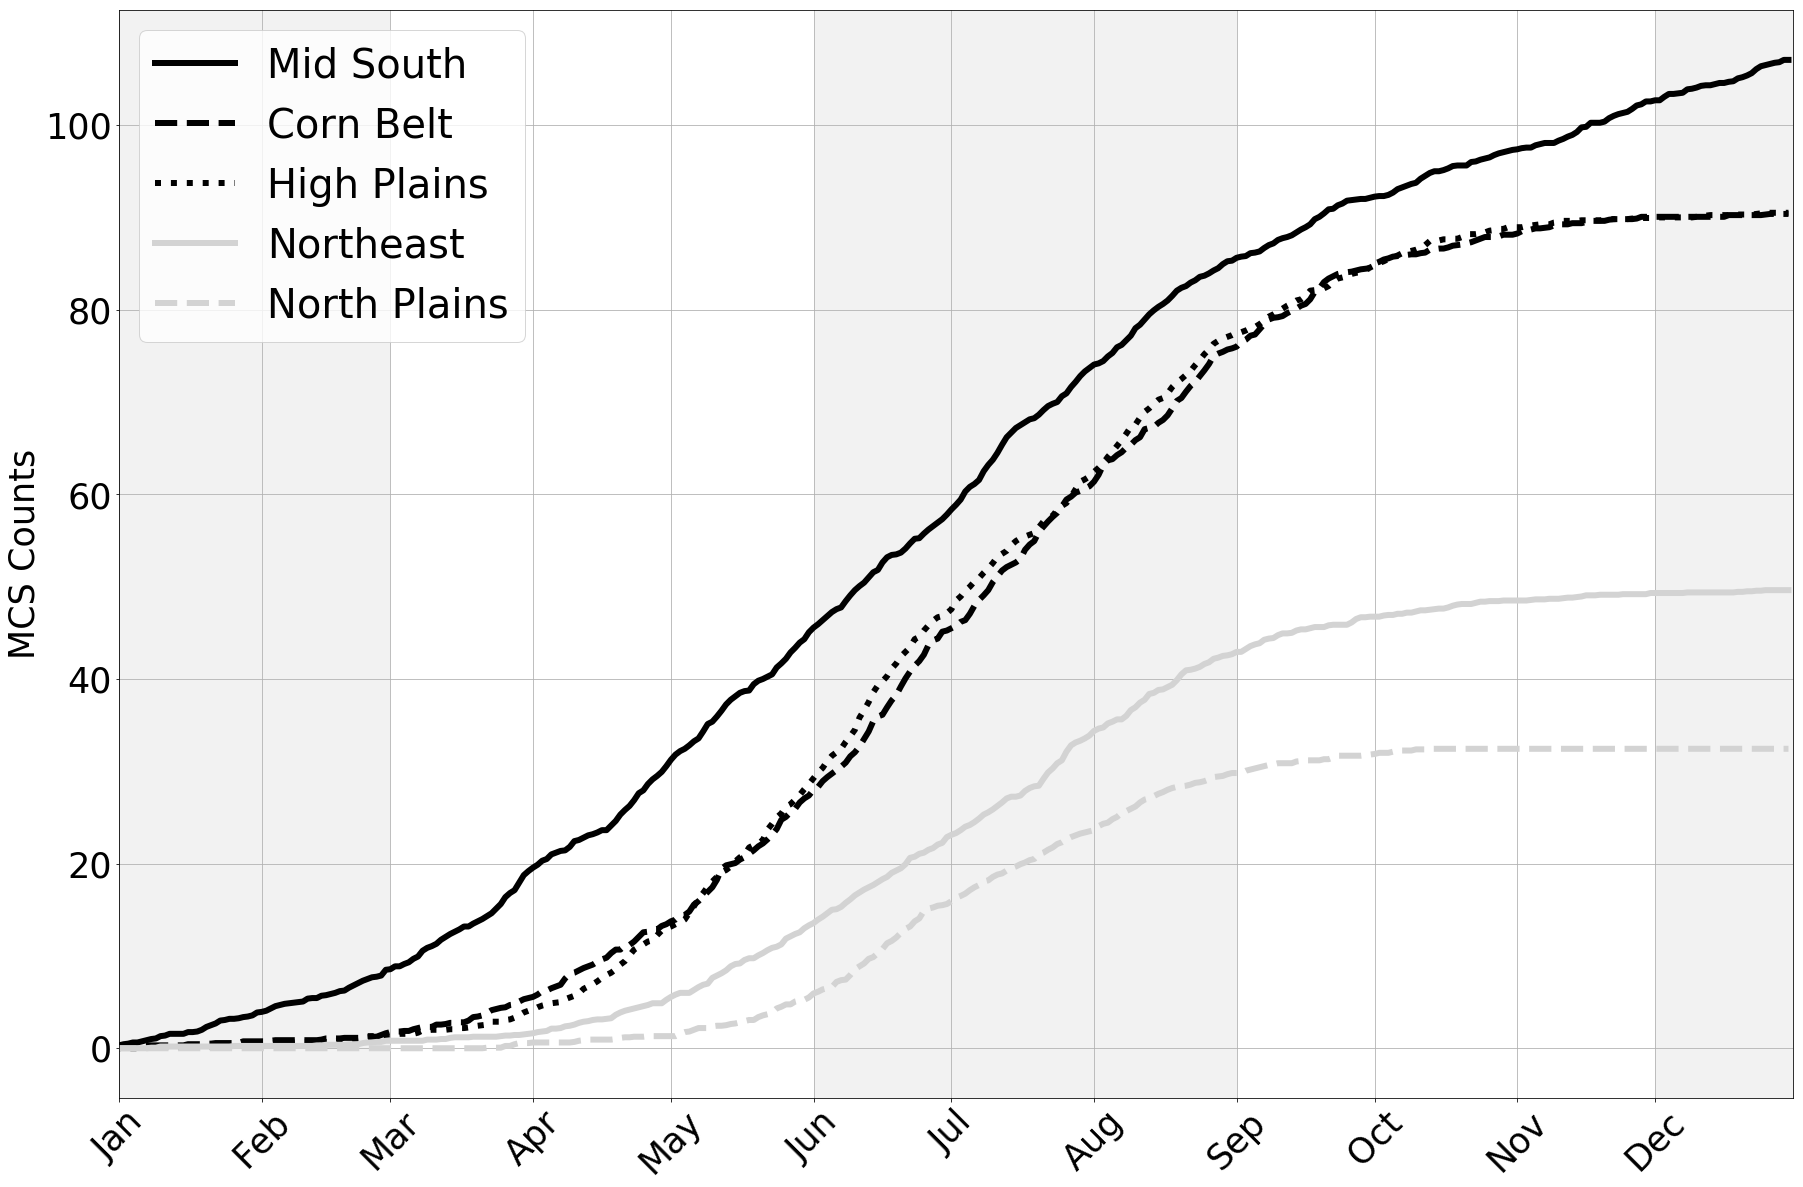

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 35
plt.rcParams['ytick.labelsize'] = 35

regions = {'econus':'E. CONUS', 'cornbelt':'Corn Belt', 'high_plains':'High Plains', 
            'mid_south':'Mid South', 'north_east':'Northeast', 'north_plains':'North Plains'}

ax = plt.subplot(1,1,1)

def draw_cumu_labels(ax):
    ax.set_xlim(1, 365)
    
    ax.set_xticks(list(month_doy.values()))
    ax.set_xticklabels(list(month_doy.keys()), rotation=45)
    
    ax.axvspan(month_doy['Jan'], month_doy['Mar'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Jun'], month_doy['Sep'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Dec'], 365, facecolor='0.5', alpha=0.1)
    ax.grid()
    return ax

linetype = ['-', '--', ':', '-', '--', ':']
color = ['k', 'k', 'k', 'lightgrey', 'lightgrey', 'lightgrey']

ax = plt.subplot(1, 1, 1)

for count, key in enumerate(['mid_south', 'cornbelt', 'high_plains', 'north_east', 'north_plains']):
    
    df_select = pd.read_csv(track_loc + key + "_mcs_swaths_within.csv")
        
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')
    

    df_select['doy'] = df_select.index.dayofyear
    years = df_select.groupby(df_select.index.year)
    year_data = np.zeros(shape=(16, 365))

    for yid, year in years:
        
        if yid >= 2002:
            data = []

            if yid in [2004, 2008, 2012, 2016]:

                #iterate 1 to 366 days
                for i in range(1, 367):

                    #business as usual
                    if i != 60:
                        s_count = year[year['doy'].values <= i]
                        data.append(s_count.storm_num.nunique())

                    #Otherwise, add February 29th to February 28th count 
                    else:
                        s_count = year[year['doy'].values <= i]
                        data[-1] = s_count.storm_num.nunique()
            else:

                #iterate 1 to 365 days
                for i in range(1, 366):
                    s_count = year[year['doy'].values <= i]
                    data.append(s_count.storm_num.nunique())

            year_data[yid-2002, :] = np.array(data)
        
    #ax.set_title(key)
    ax.plot(np.mean(year_data, axis=0), color=color[count], 
            ls=linetype[count], linewidth=6, label=regions[key])

draw_cumu_labels(ax)
ax.legend(loc=2, prop={'size':40})
ax.set_ylabel("MCS Counts", fontsize=35)
#ax.set_title("Cumulative MCS Preciptation Volume")

plt.savefig("Fig10b.tif", bbox_inches='tight', dpi=300)

Examine amount of times a track exists during a particular hour in a particular region. (Figure 4)

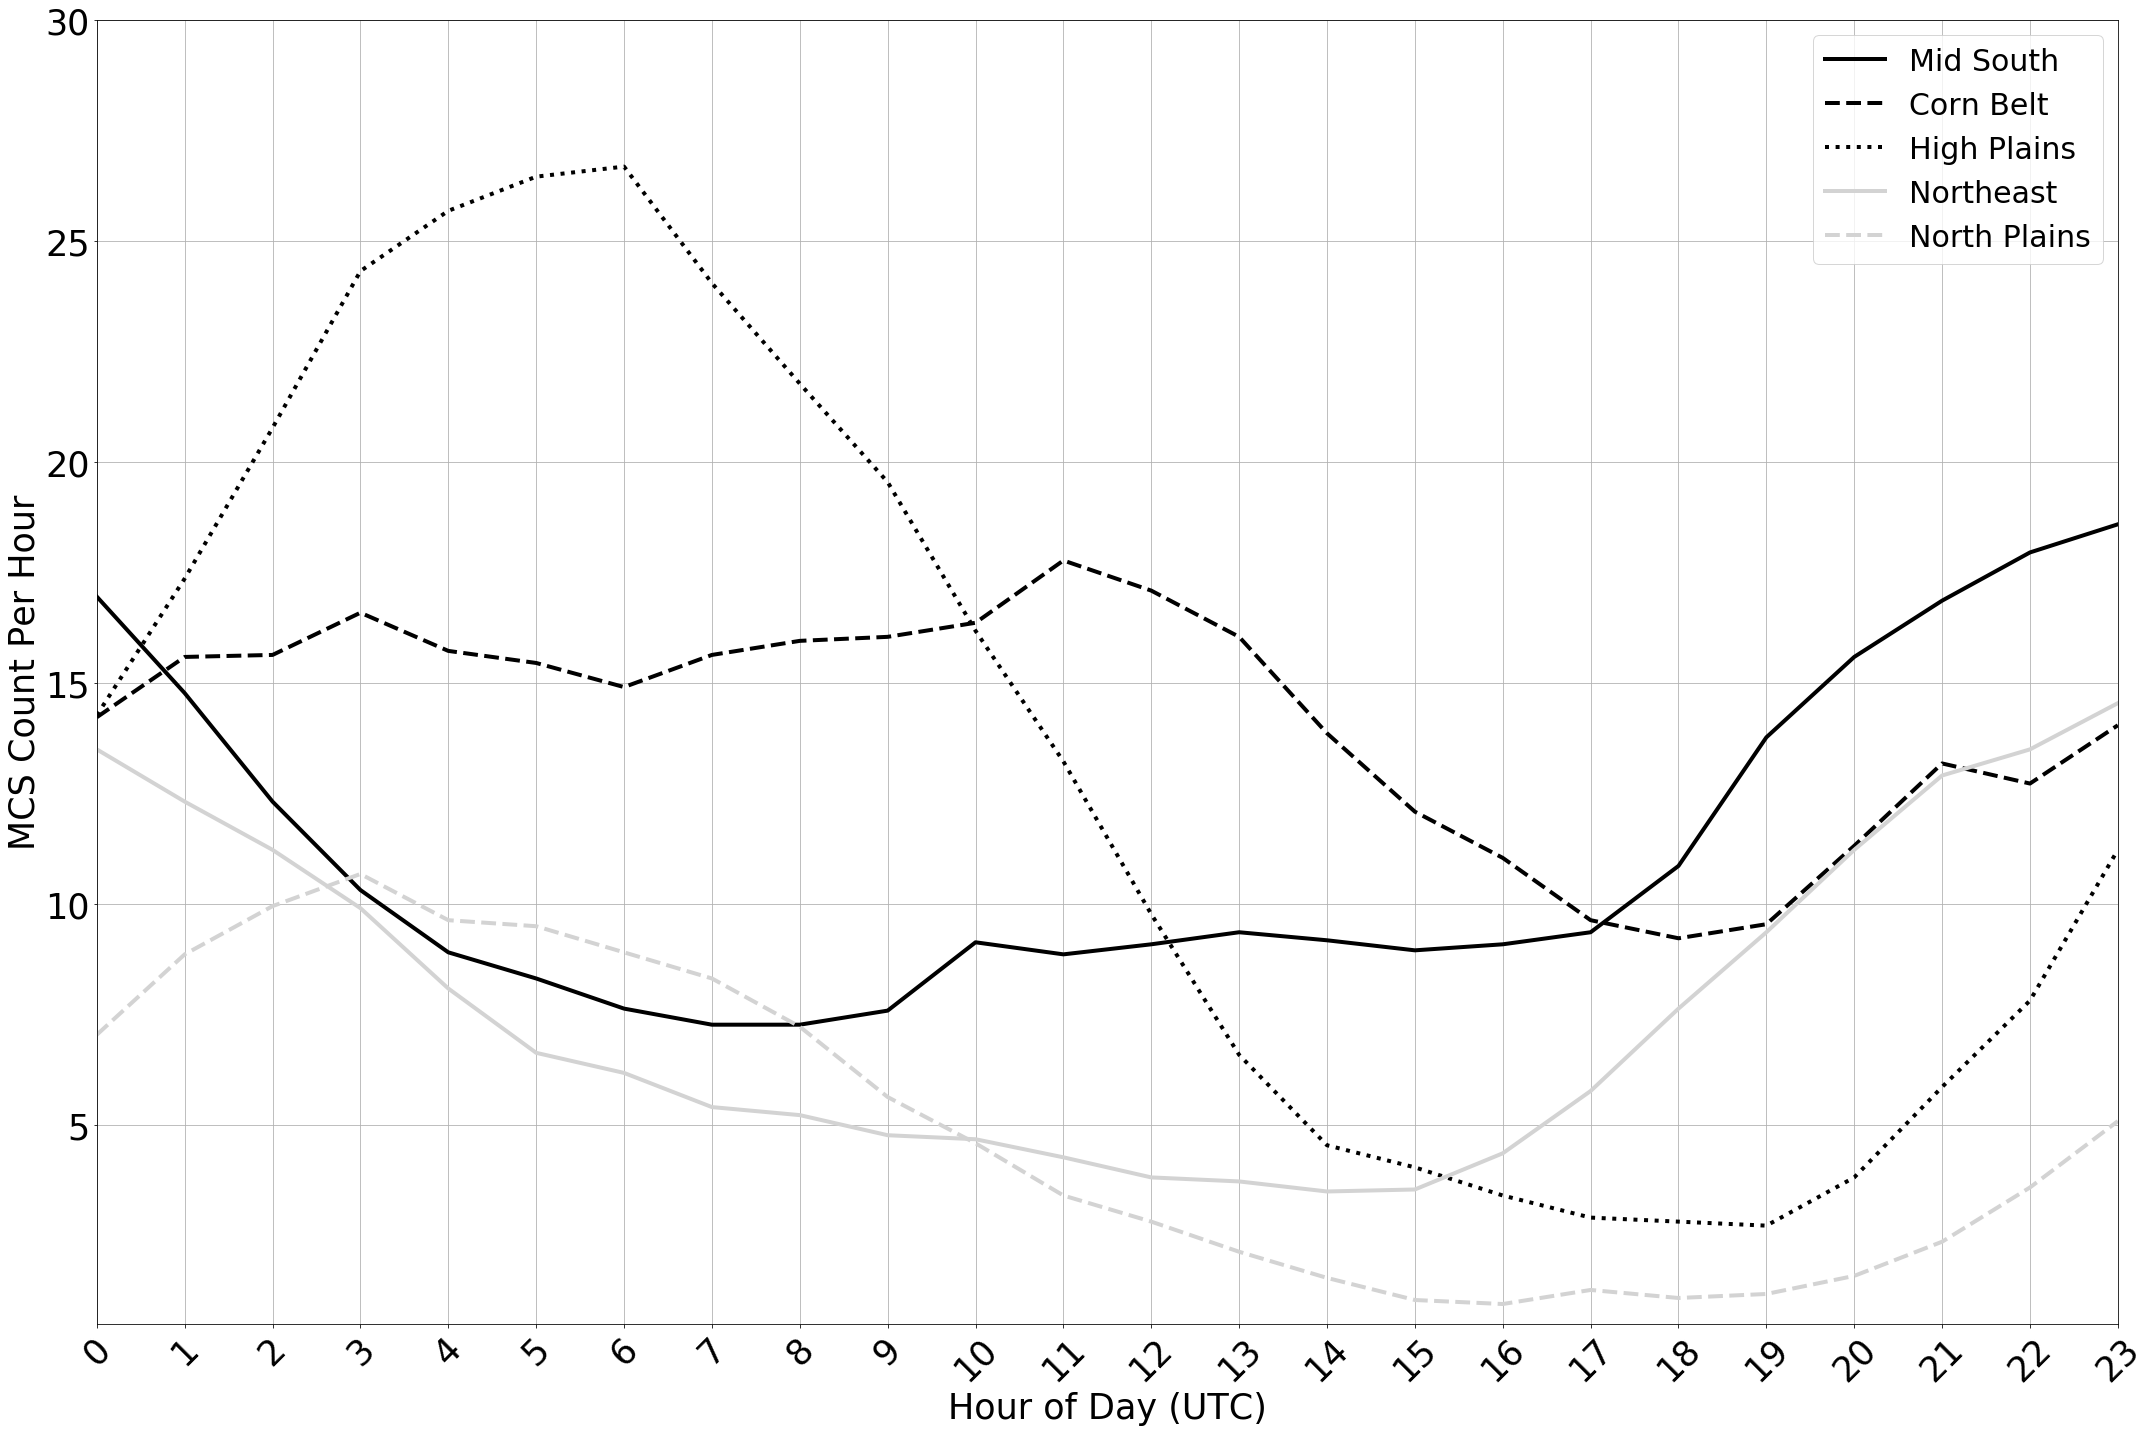

In [4]:
plt.rcParams['figure.figsize'] = 30, 20

def draw_hour_labels(ax, lab):
    ax.set_xlim(0, 23)
    ax.legend(prop={'size': 30})
    ax.set_xlabel("Hour of Day (UTC)", fontsize=35)
    ax.set_xticks(list(range(0, 24)))
    ax.set_xticklabels(list(range(0, 24)), rotation=45)
    #ax.set_title(lab + " Swath Count by Hour of Day", fontsize=20)
    ax.grid()
    return ax

linetype = ['-', '--', ':', '-', '--', ':']
color = ['k', 'k', 'k', 'lightgrey', 'lightgrey', 'lightgrey']

ax = plt.subplot(1, 1, 1)

regions = {'econus':'E. CONUS', 'cornbelt':'Corn Belt', 'high_plains':'High Plains', 
            'mid_south':'Mid South', 'north_east':'Northeast', 'north_plains':'North Plains'}

for count, key in enumerate(['mid_south', 'cornbelt', 'high_plains', 'north_east', 'north_plains']):

    df_select = pd.read_csv(track_loc + key + "_mcs_swaths_within.csv")
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')

    df_ = df_select[df_select.index.month.isin([5,6,7,8])].copy()

    years = df_.groupby(df_.index.year)
    year_data = np.zeros((22, 24), dtype=int)

    for yid, year in years:

        hour_data = []
        for hid in range(0, 24):

            hour = year[year.index.hour==hid].copy()
            hour_data.append(hour.storm_num.nunique())

        year_data[yid-1996, :] = np.array(hour_data)

    ax.plot(np.mean(year_data, axis=0), color=color[count], 
            ls=linetype[count], label=regions[key], linewidth=4)

ax.set_ylabel("MCS Count Per Hour", fontsize=35)
ax = draw_hour_labels(ax, key.upper())
ax.set_ylim(0.5, 30)
plt.tight_layout()

plt.savefig("Fig4.tif", bbox_inches='tight', dpi=300)

Examine summary statistics of MCS slice attributes (Figure 5)

C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


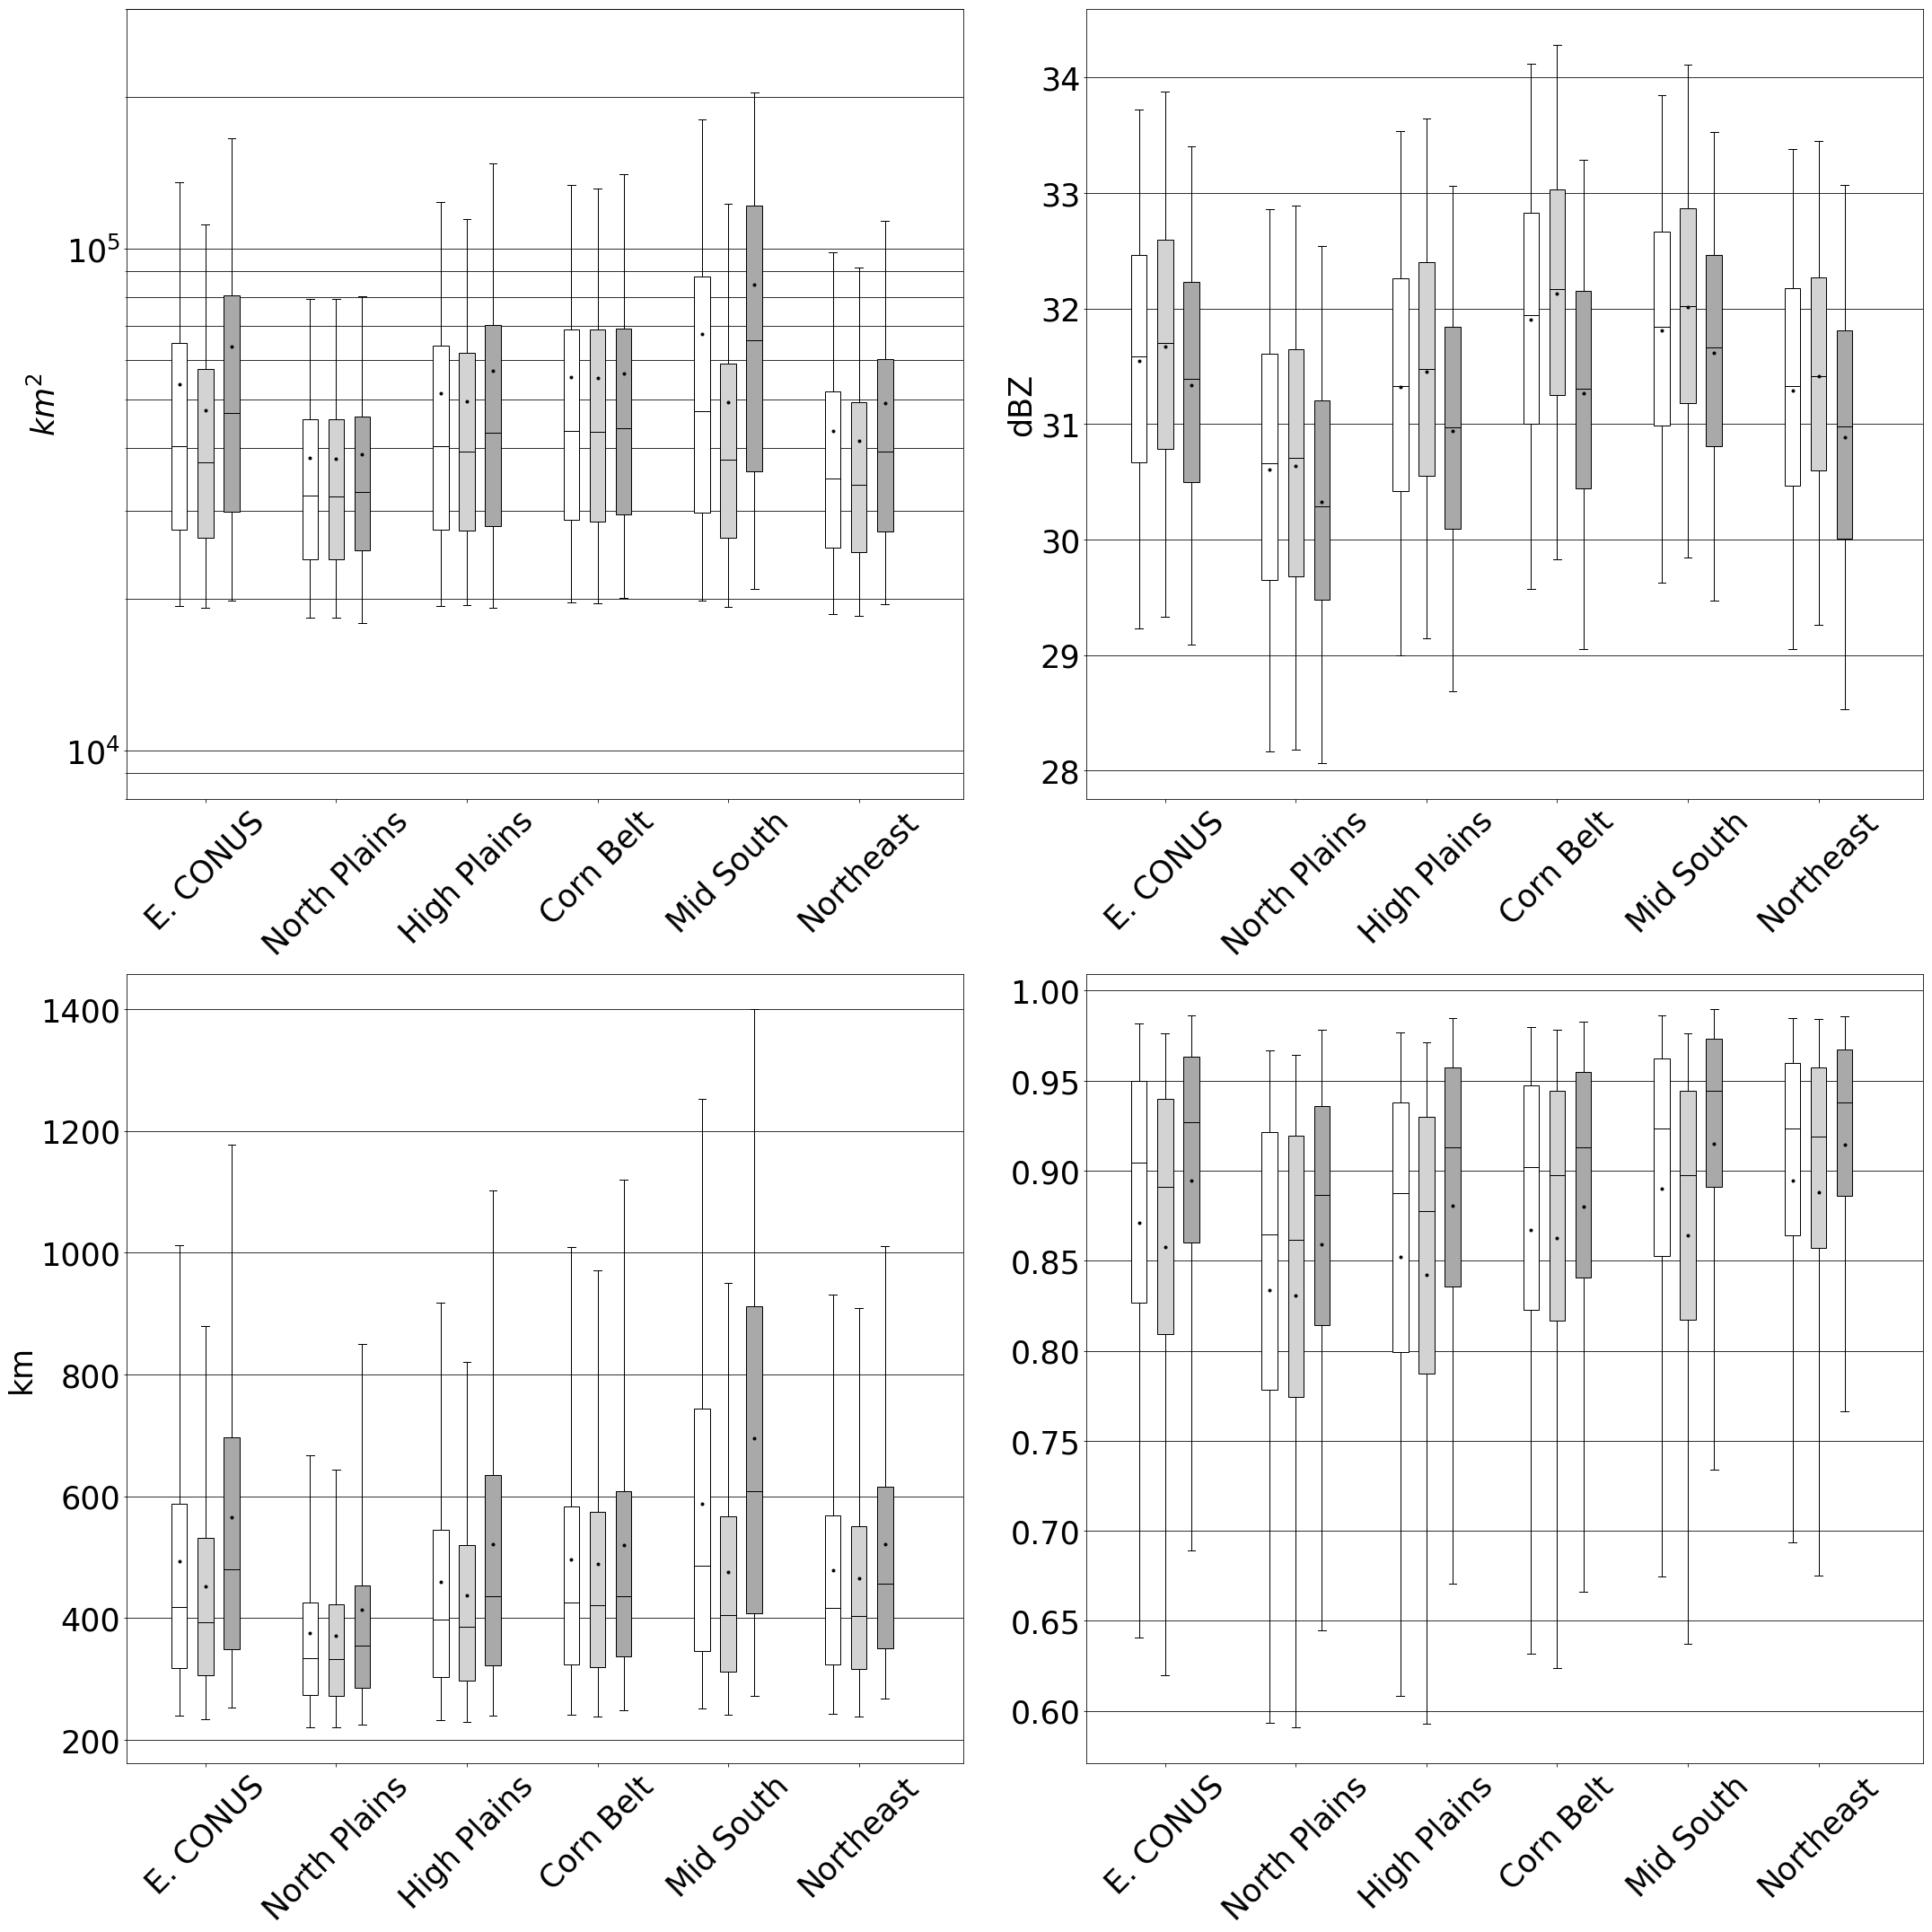

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

plt.rcParams['figure.figsize'] =30,30
plt.rcParams['xtick.labelsize'] = 35
plt.rcParams['ytick.labelsize'] = 35

from matplotlib.patches import Polygon

regions = {'E. CONUS':'econus', 'High Plains':'high_plains', 'Corn Belt':'cornbelt', 
           'Mid South':'mid_south', 'Northeast':'north_east',
           'North Plains': 'north_plains'}
 

meanpointprops = dict(marker='.', markeredgecolor='black',
                      markerfacecolor='black')

basic_slice_stats = {'variable':[], 'region':[], 'period':[], 'max':[], 'min':[], 'mean':[]}

colors = ['w', 'lightgrey', 'darkgrey']

labels = {'area': r'$km^2$', 'mean_intensity':'dBZ', 'major_axis_length':'km', 'eccentricity':' '}

for fignum, var in enumerate(['area', 'mean_intensity', 'major_axis_length', 'eccentricity']):
    
    results = {'E. CONUS':{'Annual':None, 'May-Aug':None, 'Sep-Apr':None}, 
           'High Plains':{'Annual':None, 'May-Aug':None, 'Sep-Apr':None},
           'Corn Belt': {'Annual':None, 'May-Aug':None, 'Sep-Apr':None},
           'Mid South': {'Annual':None, 'May-Aug':None, 'Sep-Apr':None},
           'Northeast': {'Annual':None, 'May-Aug':None, 'Sep-Apr':None},
           'North Plains': {'Annual':None, 'May-Aug':None, 'Sep-Apr':None}}
    
    for count, key in enumerate(['E. CONUS', 'North Plains', 'High Plains', 
                                 'Corn Belt', 'Mid South', 'Northeast']):

        value = regions[key]

        df_select = pd.read_csv(track_loc + value + "_mcs_swaths_within.csv")
        df_select['datetime'] = pd.to_datetime(df_select.datetime)
        df_select = df_select.set_index('datetime')

        ax = plt.subplot(2, 2, fignum+1)
        
        results[key]['Annual'] = df_select[var].values
        
        results[key]['May-Aug'] = df_select[df_select.index.month.isin([5,6,7,8])][var].values
        results[key]['Sep-Apr'] = df_select[df_select.index.month.isin([9, 10, 11, 12, 1, 2, 3, 4])][var].values

    i = 0
    for region in ['E. CONUS', 'North Plains', 'High Plains', 
                   'Corn Belt', 'Mid South', 'Northeast']:
        
        periods = results[region]
    
        for seas, period in enumerate(['Annual', 'May-Aug', 'Sep-Apr']):

            dist = periods[period]
            bplot = ax.boxplot(dist, positions=[i], whis=[5, 95], patch_artist=True,
                               showfliers=False, showmeans=True, meanprops=meanpointprops)

            plt.setp(bplot['medians'], color='black')

            [item.set_color('black') for item in bplot['means']] 
            
            [patch.set_facecolor(colors[seas]) for patch in bplot['boxes']]

            i += .25
        i += .5
    
    ax.set_xlim(-0.5, i) 
    
    #ax.set_title(labs[spl], fontsize=30)
    ax.set_ylabel(labels[var], fontsize=35)

    if var == 'area':
        ax.set_yscale('log')
        ax.set_ylim(8000, 300000)

    ax.yaxis.grid(b=True, which='both', color='k', linestyle='-')
    
    for region, region_val in results.items():
    
        for period, period_val in region_val.items():

            basic_slice_stats['variable'].append(var)
            basic_slice_stats['region'].append(region)
            basic_slice_stats['period'].append(period)
            basic_slice_stats['max'].append(np.max(period_val))
            basic_slice_stats['min'].append(np.min(period_val))
            basic_slice_stats['mean'].append(np.mean(period_val))

df_basic_stats = pd.DataFrame.from_dict(basic_slice_stats)


    
for i in range(4):

    ax = plt.subplot(2, 2, i+1)
    ax.set_xticks([.25, 1.5, 2.75, 4, 5.25, 6.5])
    ax.set_xticklabels(['E. CONUS', 'North Plains', 'High Plains', 
                                 'Corn Belt', 'Mid South', 'Northeast'], fontsize=35, rotation=45)

    plt.tight_layout()
    
#plt.savefig("Fig5.tif", bbox_inches='tight', dpi=300)

Examine the seasonal and annual statistics of these attributes.

In [6]:
grouped = df_basic_stats.groupby('variable')

for vid, group in grouped:
    print("Variable = ", vid)
    print("\n")
    seasonal = group.groupby('period')
    
    for sid, season_group in seasonal:
        
        ordered = season_group.sort_values(by='mean', ascending=False)
        print(" Season = ", sid)
        print(ordered[['region', 'max', 'mean', 'min']])
        print("\n")

Variable =  area


 Season =  Annual
          region       max          mean      min
9      Mid South  446712.0  67478.904944  14232.0
6      Corn Belt  419060.0  55491.765210  14164.0
0       E. CONUS  455416.0  53509.684050  14164.0
3    High Plains  348840.0  51544.182408  14196.0
12     Northeast  243780.0  43191.891029  14236.0
15  North Plains  182184.0  38222.462352  14500.0


 Season =  May-Aug
          region       max          mean      min
7      Corn Belt  419060.0  55210.378999  14164.0
4    High Plains  273208.0  49582.587212  14392.0
10     Mid South  289364.0  49354.665163  14232.0
1       E. CONUS  419060.0  47667.322432  14164.0
13     Northeast  230540.0  41359.990437  14236.0
16  North Plains  182184.0  38151.318625  14500.0


 Season =  Sep-Apr
          region       max          mean      min
11     Mid South  446712.0  84792.004955  14332.0
2       E. CONUS  455416.0  63747.096249  14180.0
5    High Plains  348840.0  57062.570593  14196.0
8      Corn Belt  284

Calculate values for a heat map of monthly MCS counts

In [7]:
df = pd.read_csv(track_loc + "econus_mcs_swaths_within.csv")
df['datetime'] = pd.to_datetime(df.datetime)
df = df.set_index('datetime')

monthly = np.zeros(shape=(13, 23), dtype=int)

for i, year in enumerate(range(1996, 2018)):
    
    df_ = df[(df.index.year==year)].copy()
    df_['month'] = df_.index.month
             
    df_first = df_.groupby('storm_num').first()
    
    for j, month in enumerate(range(1, 13)):
    
        df_m = df_first[df_first.month==month]
        
        monthly[j, i] = len(np.unique(df_m.index))

Plot heat map of monthly counts of MCS tracks (Figure 2)

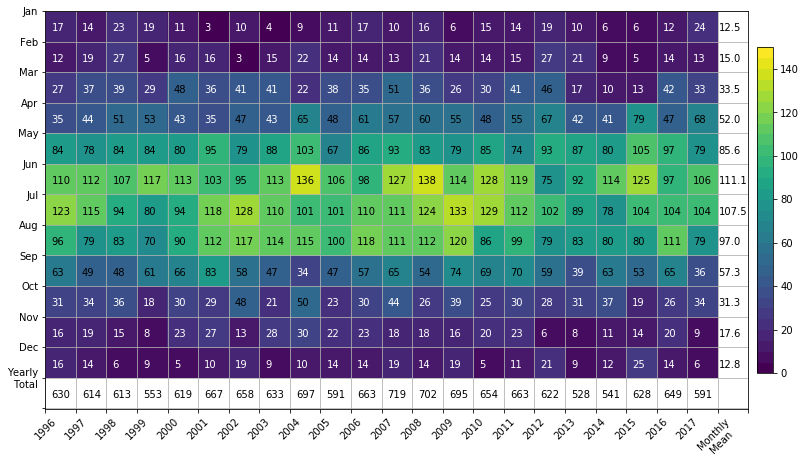

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

mon = monthly.copy()
mon[-1, :] = -1
mon[:, -1] = -1

mon = np.ma.masked_where(mon<0, mon)

from matplotlib.colors import BoundaryNorm
cmap = plt.cm.viridis
classes = list(range(0, 155, 5))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.imshow(mon, norm=norm, cmap=cmap)

plt.xticks(np.array(range(0, 24))-.5, list(range(1996, 2018))+["Monthly\nMean"], rotation=45)
plt.yticks(np.array(range(0, 14))-.53, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                                       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Yearly\nTotal'])
plt.colorbar(shrink=.4, pad=0.01)
plt.grid()

for i in range(12):
    for j in range(22):
        
        if monthly[i, j] <= 45:
            plt.annotate(monthly[i, j], xy=(j-.3, i+.13), color='w')
        else:
            plt.annotate(monthly[i, j], xy=(j-.3, i+.13), color='k')
        
yr = np.sum(monthly, axis=0)
for i in range(22):
    plt.text(i-.3, 12+.13, yr[i])
    
mn = np.sum(monthly, axis=1)
for i in range(12):
    plt.text(22-.48, i+.13, "%.1f" % (mn[i]/22))
    
#plt.savefig("Fig2.tif", bbox_inches='tight', dpi=300)

Do the same as above for yearly counts, except for MCS rainfall volume. (Figure 8)

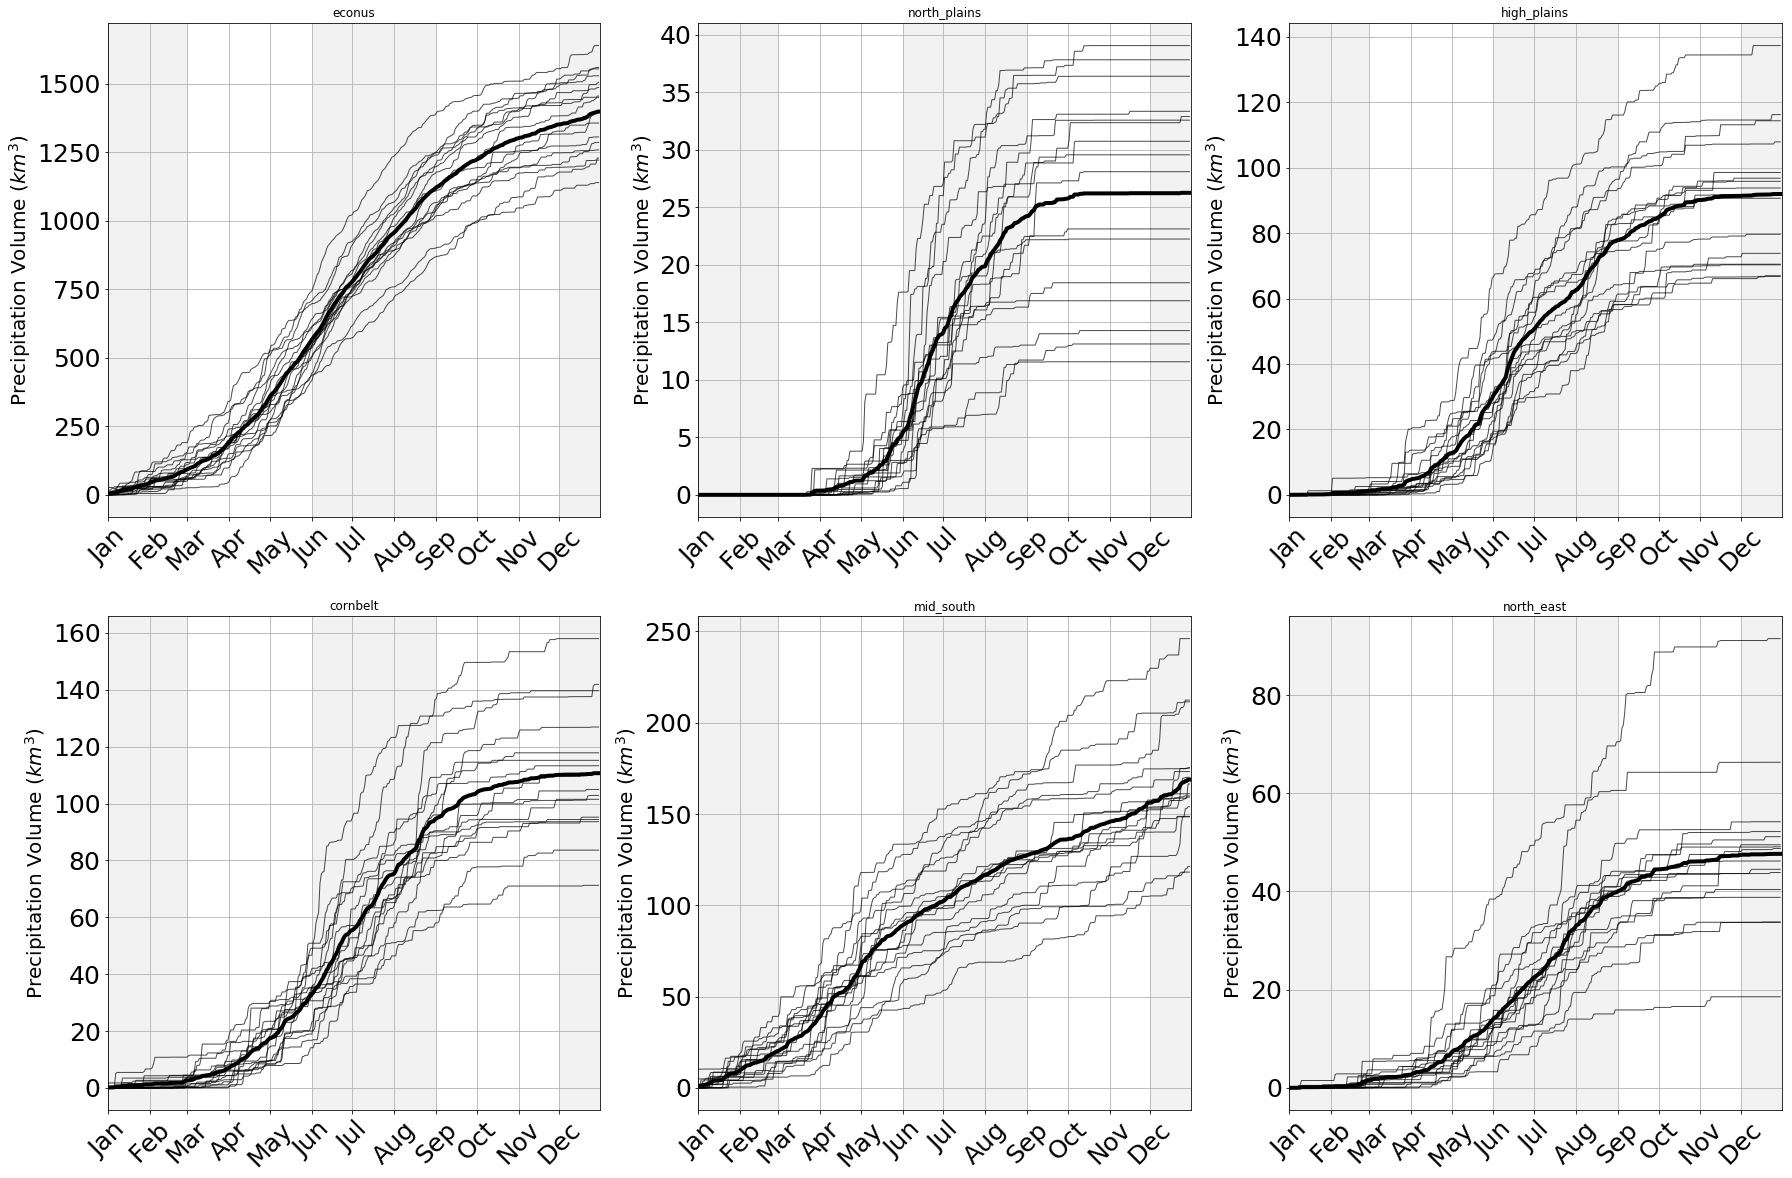

In [9]:
plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

d = {'Year':[], 'MCS_Vol':[], 'TOT_Vol':[], 'Region':[]}
ax = plt.subplot(1,1,1)

volume_loc = "../data/track_data/"

def draw_cumu_labels(ax):
    ax.set_xlim(1, 365)
    
    ax.set_xticks(list(month_doy.values()))
    ax.set_xticklabels(list(month_doy.keys()), rotation=45)
    
    ax.axvspan(month_doy['Jan'], month_doy['Mar'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Jun'], month_doy['Sep'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Dec'], 365, facecolor='0.5', alpha=0.1)
    ax.grid()
    return ax

for count, key in enumerate(['econus', 'north_plains', 'high_plains', 'cornbelt', 'mid_south', 'north_east']):
    
    ax = plt.subplot(2, 3, count+1)                       
    df_select = pd.read_csv(volume_loc + key + "_volume1.csv")
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')

    df_select['doy'] = df_select.index.dayofyear
    years = df_select.groupby(df_select.index.year)

    year_data = np.zeros(shape=(16, 365))

    texts = []

    for yid, year in years:

        data_mcs = []
        data = []
        
        if yid in [2004, 2008, 2012, 2016]:

            #iterate 1 to 366 days
            for i in range(1, 367):

                #business as usual
                if i != 60:
                    s_count = year[year['doy'].values <= i]
                    data.append(np.sum(s_count.cur_vol.values))
                    data_mcs.append(np.sum(s_count.cur_mcs.values))

                #Otherwise, add February 29th to February 28th count 
                else:
                    s_count = year[year['doy'].values <= i]
                    data[-1] = np.sum(s_count.cur_vol.values)
                    data_mcs[-1] = np.sum(s_count.cur_mcs.values)
        else:

            #iterate 1 to 365 days
            for i in range(1, 366):
                s_count = year[year['doy'].values <= i]
                data.append(np.sum(s_count.cur_vol.values))
                data_mcs.append(np.sum(s_count.cur_mcs.values))

        year_data[yid-2002, :] = np.array(data_mcs)
        
        ax.plot(data_mcs, 'k-', linewidth=1, alpha=0.7)

        ax.set_title(key)
        d['Year'].append(yid)
        d['TOT_Vol'].append(data[-1])
        d['MCS_Vol'].append(data_mcs[-1])
        d['Region'].append(key)

    ax.plot(np.mean(year_data, axis=0), 'k-', linewidth=4)
    ax.set_ylabel("Precipitation Volume (" + r'$km^3$' + ")", fontsize=20)

    draw_cumu_labels(ax)
    
#plt.savefig("Fig8.tif", bbox_inches='tight', dpi=300)

Examine yearly statistics of MCS rainfall volume

In [10]:
from scipy.stats import variation
counts = pd.DataFrame.from_dict(d)

for gid, group in counts.groupby('Region'):
    
    g = group.sort_values(by='MCS_Vol', ascending=True)
    g['perc'] = 100*(g['MCS_Vol'] / g['TOT_Vol'])
    
    g = g.sort_values(by='perc', ascending=True)
    print(g)
    print(g[['MCS_Vol', 'TOT_Vol', 'perc']].mean())
    print('C.V. MCS', variation(g.MCS_Vol.values))
    print('C.V. Tot', variation(g.TOT_Vol.values))
    print("\n")

    Year     MCS_Vol     TOT_Vol    Region       perc
55  2009   93.593264  345.238305  cornbelt  27.109757
61  2015  102.854741  369.194817  cornbelt  27.859205
52  2006  101.470820  327.890516  cornbelt  30.946555
59  2013  104.938762  335.828994  cornbelt  31.247678
58  2012   71.225648  224.987871  cornbelt  31.657550
60  2014  115.182664  355.124828  cornbelt  32.434416
63  2017  110.671490  340.112474  cornbelt  32.539674
51  2005   83.601101  255.478110  cornbelt  32.723391
49  2003   94.357600  273.167617  cornbelt  34.542015
57  2011  113.278421  316.378776  cornbelt  35.804684
62  2016  126.902411  340.724677  cornbelt  37.244855
54  2008  141.898234  378.790712  cornbelt  37.460854
50  2004  117.828564  310.084117  cornbelt  37.998903
48  2002   95.194789  245.113962  cornbelt  38.836951
53  2007  139.665818  333.589718  cornbelt  41.867543
56  2010  157.991368  334.236905  cornbelt  47.269277
MCS_Vol    110.665981
TOT_Vol    317.871400
perc        34.846457
dtype: float64
C

Compare mean values of MCS rainfall volume by region. (Figure 10)

C:\Users\AlexHaberlie\Anaconda3\envs\py36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


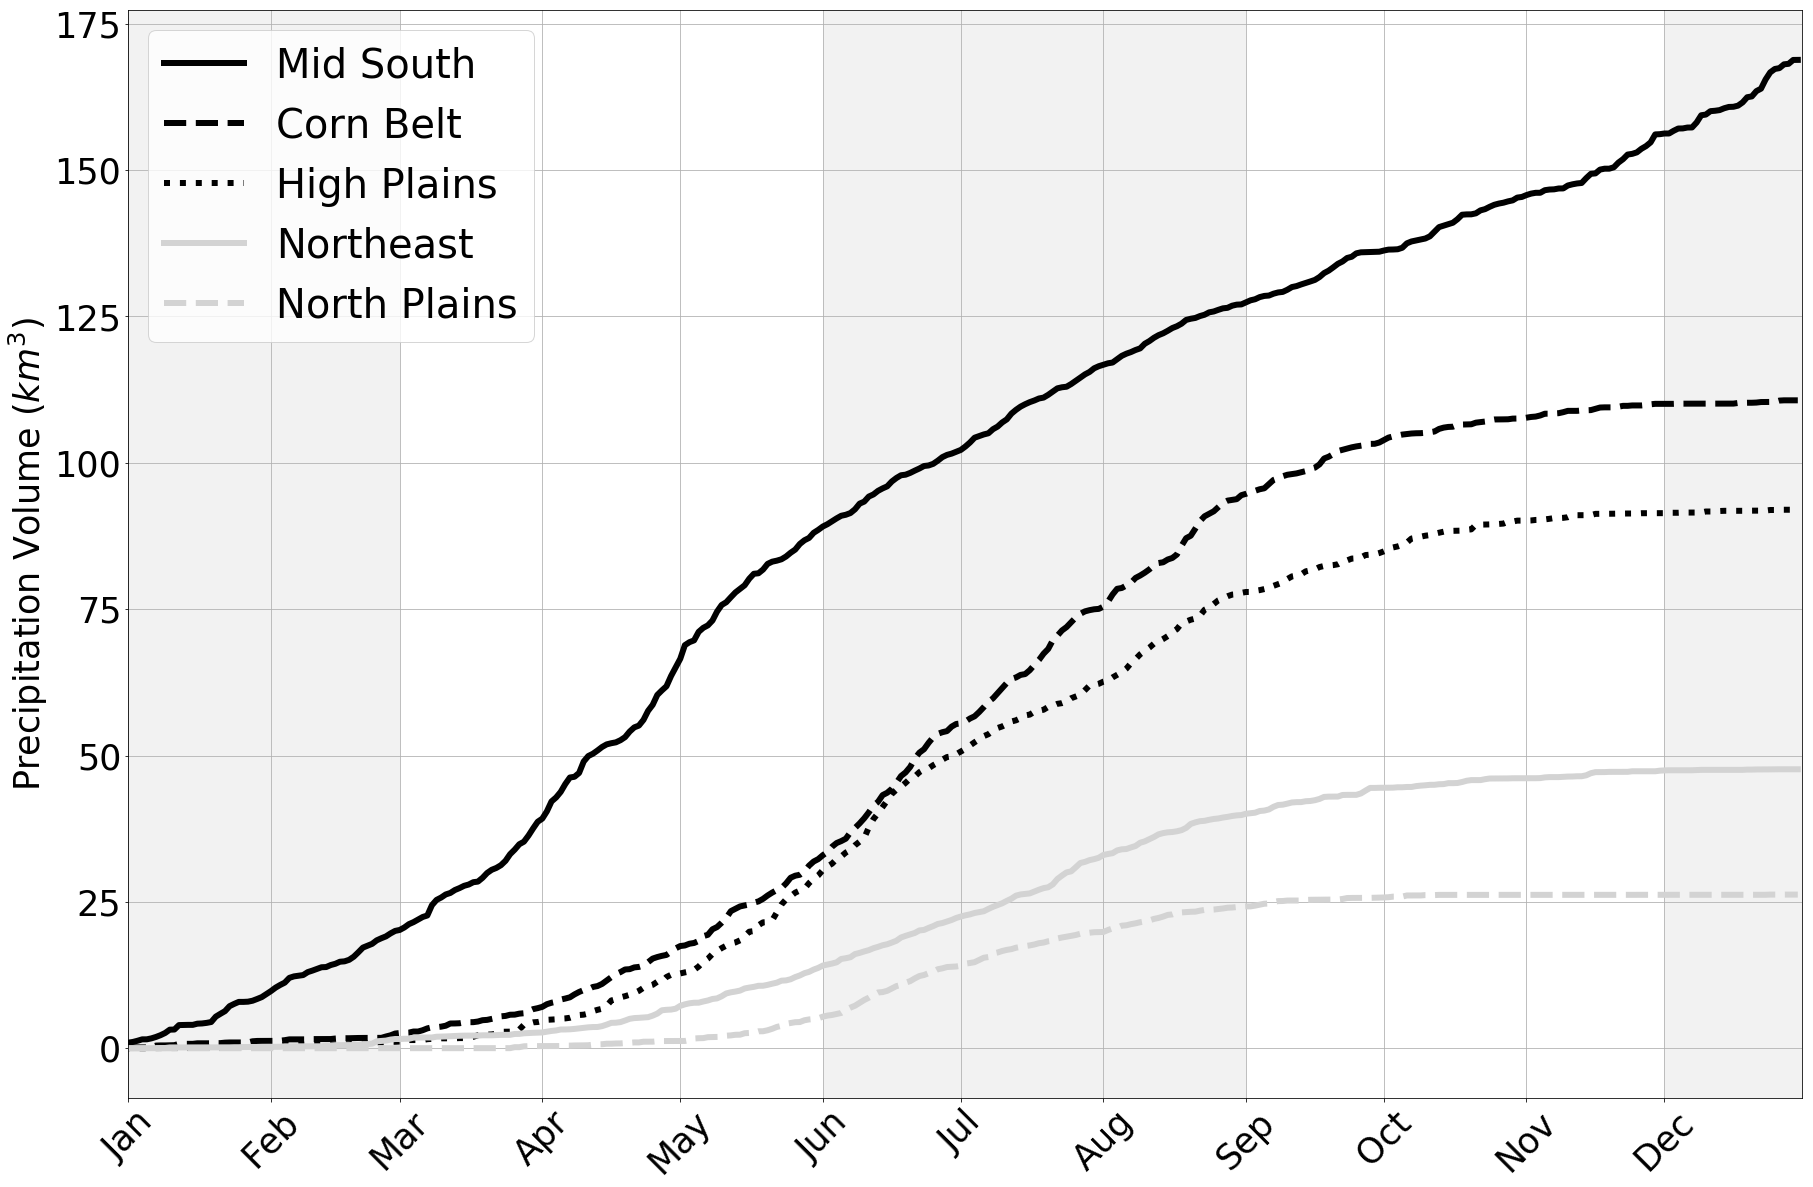

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 35
plt.rcParams['ytick.labelsize'] = 35
regions = {'conus':'E. CONUS', 'cornbelt':'Corn Belt', 'high_plains':'High Plains', 
            'mid_south':'Mid South', 'north_east':'Northeast', 'north_plains':'North Plains'}

linetype = ['-', '--', ':', '-', '--', ':']
color = ['k', 'k', 'k', 'lightgrey', 'lightgrey', 'lightgrey']

def draw_cumu_labels(ax):
    ax.set_xlim(1, 365)
    
    ax.set_xticks(list(month_doy.values()))
    ax.set_xticklabels(list(month_doy.keys()), rotation=45)
    
    ax.axvspan(month_doy['Jan'], month_doy['Mar'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Jun'], month_doy['Sep'], facecolor='0.5', alpha=0.1)
    ax.axvspan(month_doy['Dec'], 365, facecolor='0.5', alpha=0.1)
    ax.grid()
    return ax

for count, key in enumerate(['mid_south', 'cornbelt', 'high_plains', 'north_east', 'north_plains']):
    
    ax = plt.subplot(1, 1, 1)                       
    df_select = pd.read_csv(track_loc + key + "_volume1.csv")
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')

    df_day = df_select.resample('D').sum()
    df_day['doy'] = df_day.index.dayofyear
    
    df_day.loc[pd.isnull(df_day['cur_mcs']), 'cur_mcs'] = 0.0
    df_day.loc[pd.isnull(df_day['cur_vol']), 'cur_vol'] = 0.0
    years = df_day.groupby(df_day.index.year)

    year_data = np.zeros(shape=(16, 365))

    for yid, year in years:
        
        data = []

        if yid in [2004, 2008, 2012, 2016]:

            #iterate 1 to 366 days
            for i in range(1, 367):

                #business as usual
                if i != 60:
                    s_count = year[year['doy'].values <= i]
                    data.append(np.sum(s_count.cur_mcs.values)) 

                #Otherwise, add February 29th to February 28th count 
                else:
                    s_count = year[year['doy'].values <= i]
                    data[-1] = np.sum(s_count.cur_mcs.values)
        else:

            #iterate 1 to 365 days
            for i in range(1, 366):
                s_count = year[year['doy'].values <= i]
                data.append(np.sum(s_count.cur_mcs.values)) 
        
        year_data[yid-2002, :] = np.array(data)
        
    ax.plot(np.mean(year_data, axis=0), lw=6, color=color[count], linestyle=linetype[count], label=regions[key])

ax.set_ylabel("Precipitation Volume (" + r'$km^3$' + ")", fontsize=35)
draw_cumu_labels(ax)

ax.legend(loc=2, prop={'size':40})

#plt.savefig("Fig10b.tif", bbox_inches='tight', dpi=300)

Calculate seasonal contributions of MCS to total rainfall. (Figure 9)

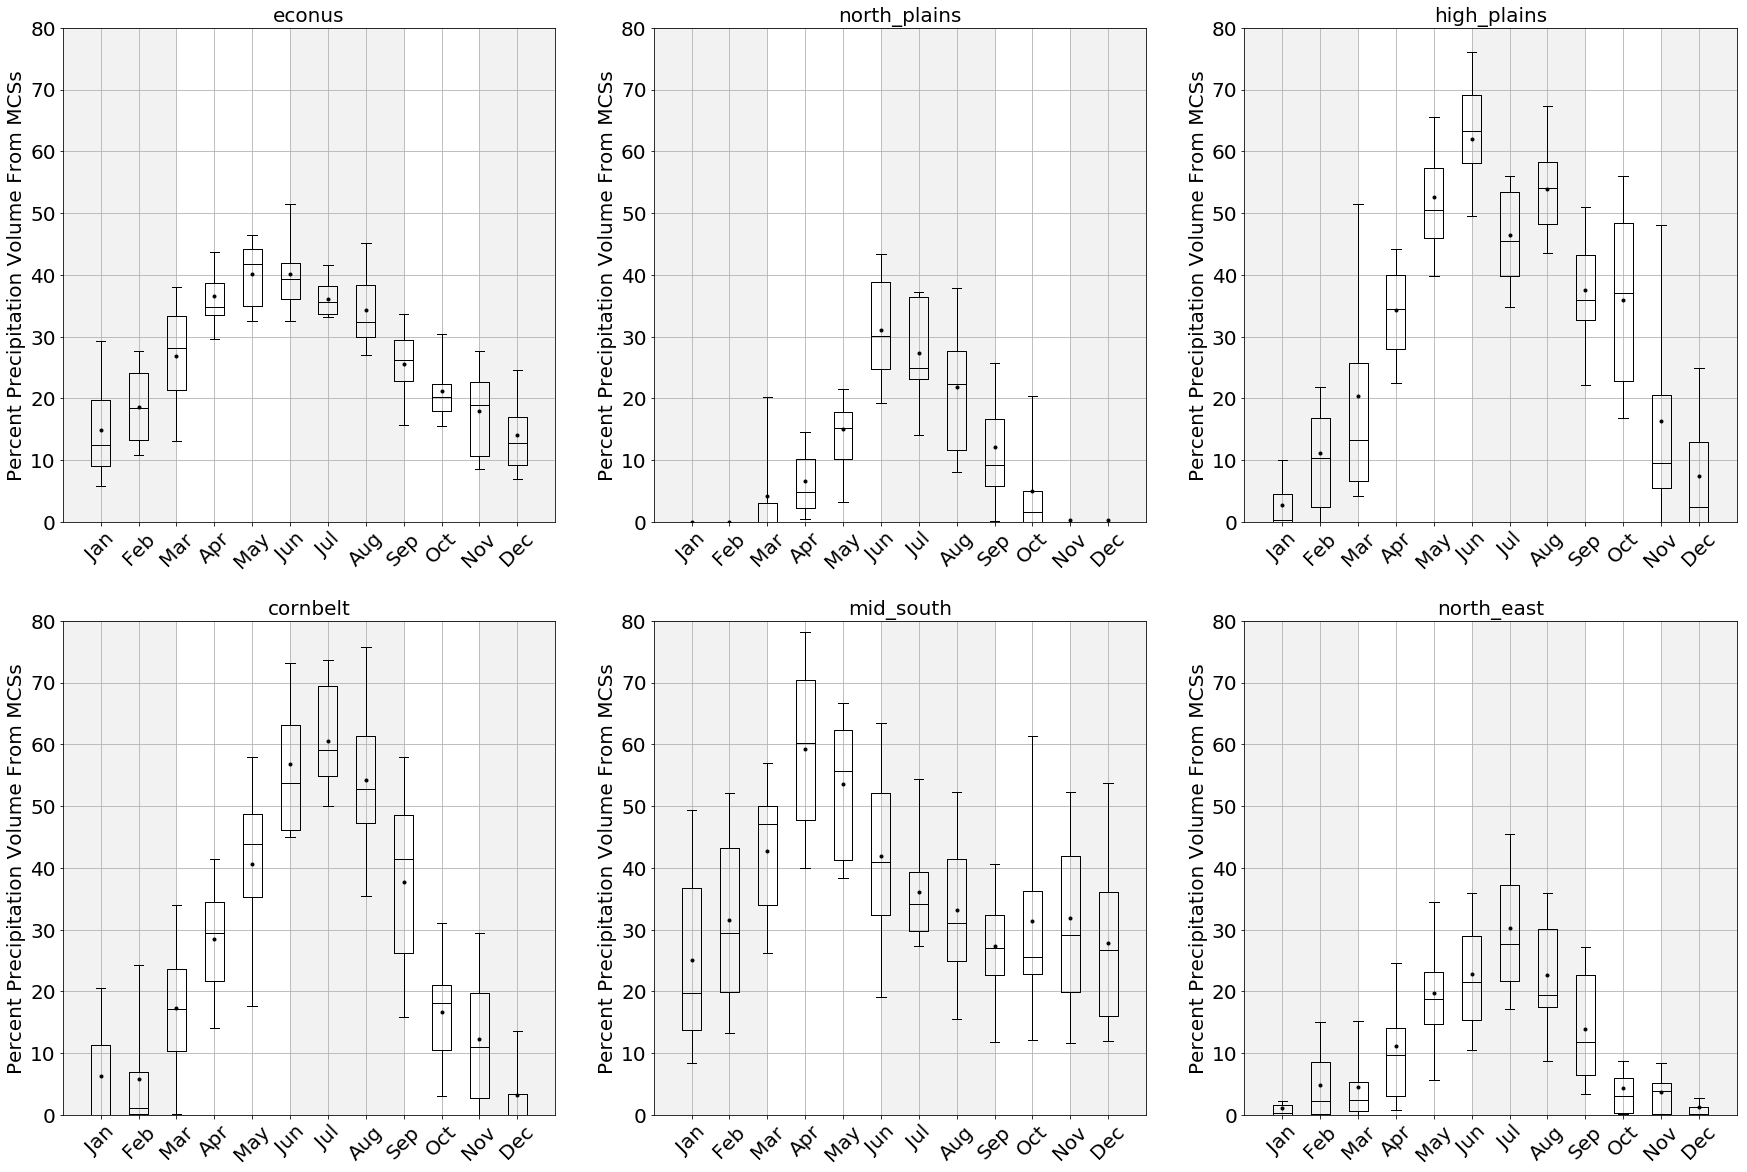

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def draw_cumu_labels(ax, ymax):
    ax.set_xlim(0, 13)
    ax.set_ylim(0, 80)
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    #ax.legend(loc=2, prop={'size': 25})
    ax.axvspan(0, 3, facecolor='0.5', alpha=0.1)
    ax.axvspan(6, 9, facecolor='0.5', alpha=0.1)
    ax.axvspan(11, 13, facecolor='0.5', alpha=0.1)
    ax.grid()
    #ax.set_ylabel("Cumulative Count", fontsize=35)
    return ax

meanpointprops = dict(marker='.', markeredgecolor='black',
                      markerfacecolor='black')
plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
regions = {'cornbelt':'Corn Belt', 'high_plains':'High Plains', 
            'mid_south':'Mid South', 'north_east':'North East', 'north_plains':'North Plains'}

basic_volume_stats = {'region':[], 'month':[], 'max':[], 'p95':[], 'mean':[], 'p5':[], 'min':[]}

for count, key in enumerate(['econus', 'north_plains', 'high_plains', 'cornbelt', 'mid_south', 'north_east']):
    
    ax = plt.subplot(2, 3, count+1)                       
    df_select = pd.read_csv(track_loc + key + "_volume1.csv")
    df_select['datetime'] = pd.to_datetime(df_select.datetime)
    df_select = df_select.set_index('datetime')
    
    df_select.loc[pd.isnull(df_select['cur_mcs']), 'cur_mcs'] = 0.0
    df_select.loc[pd.isnull(df_select['cur_vol']), 'cur_vol'] = 0.0

    df_month = df_select.resample('M').sum()
    months = df_month.groupby(df_month.index.month)
    
    data = df_month['cur_mcs']
    data1 = df_month['cur_vol']
    perc = 100*(np.array(data) / np.array(data1))

    df_month['perc'] = perc
    
    month_data = []
    for mid, month in months:
        data = month['cur_mcs']
        data1 = month['cur_vol']
        perc = 100*(np.array(data) / np.array(data1))
        month_data.append([x for x in perc])
        
        basic_volume_stats['region'].append(key)
        basic_volume_stats['month'].append(mid)
        basic_volume_stats['max'].append(np.max(perc))
        basic_volume_stats['p95'].append(np.percentile(perc, 95))
        basic_volume_stats['mean'].append(np.mean(perc))
        basic_volume_stats['p5'].append(np.percentile(perc, 5))
        basic_volume_stats['min'].append(np.min(perc))
        
    bplot = ax.boxplot(month_data, positions=list(range(1, 13)), 
               whis=[5, 95], showfliers=False, showmeans=True, meanprops=meanpointprops)

    plt.setp(bplot['medians'], color='black')
    
    plt.title(key, fontsize=20)

    [item.set_color('black') for item in bplot['means']] 
    ax.set_ylabel("Percent Precipitation Volume From MCSs", fontsize=20)

    draw_cumu_labels(ax, 1)
    
#plt.savefig("Fig9.tif", bbox_inches='tight', dpi=300)

Examine stats of monthly percentages

In [13]:
from scipy.stats import variation

vol_stats = pd.DataFrame.from_dict(basic_volume_stats)

for gid, group in vol_stats.groupby('region'):
    
    print("\n")
    print("Region = ", gid)
    print("Descriptive statistics of MCS percent contribution to rainfall volume per month")
    
    g = group.sort_values(by='month', ascending=True)
    
    print(g[['month', 'max', 'p95', 'mean', 'p5', 'min']])



Region =  cornbelt
Descriptive statistics of MCS percent contribution to rainfall volume per month
    month        max        p95       mean         p5        min
36      1  31.709110  23.355965   6.264369   0.000000   0.000000
37      2  25.027821  24.499172   5.783947   0.000000   0.000000
38      3  39.526258  35.402038  17.361911   0.128175   0.113763
39      4  41.490804  41.409980  28.440112  14.001743  13.740875
40      5  62.738692  59.138429  40.650042  17.397421  16.809035
41      6  79.363945  74.711713  56.861400  44.700044  43.783377
42      7  73.799763  73.677218  60.557066  46.335264  35.521560
43      8  79.358284  76.593263  54.182668  34.509139  31.800271
44      9  62.725257  59.118178  37.666140  14.557518  10.652742
45     10  39.590858  33.181131  16.667029   2.320141   0.000711
46     11  29.850120  29.513894  12.299547   0.003833   0.000000
47     12  22.920374  15.964240   3.190087   0.000000   0.000000


Region =  econus
Descriptive statistics of MCS perce